# K Nearest Neighbors

## **Description**
The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another. KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).


## Packages used
- numpy
- pandas
- seaborn
- sklearn
- matplotlib


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

## Read in the data set

In [2]:
df = pd.read_csv("winequality-red.csv")
df2 = df.rename(columns = {'volatile acidity': 'volatileacidity', 
                'citric acid':'citricacid', 'fixed acidity':'fixedacidity',
                'residual sugar':'residualsugar', 'free sulfur dioxide':'freesulfurdioxide',
                'total sulfur dioxide':'totalsulfurdioxide'})

df2.head()
df3 = df2.iloc[:1600][["pH", "totalsulfurdioxide",'quality']]


## Show good, bad and average wine in graph to visualize

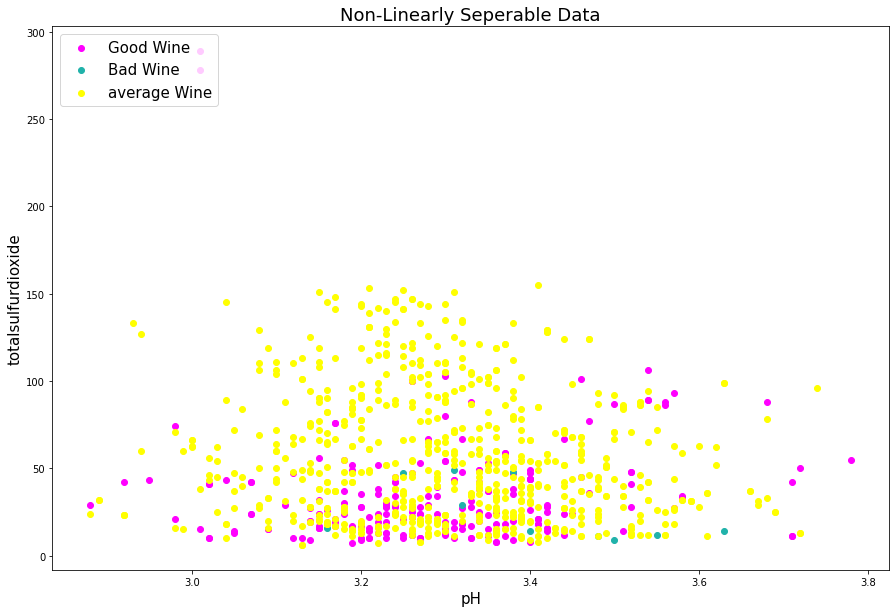

In [3]:
Good = df3[df3.quality >= 7 ]
avr =df3[df3.quality == 5]
Bad = df3[df3.quality <=3]
city1 = ["San_Paulo"]
colors = ["red"]

fig, ax2 = plt.subplots(1, 1, figsize=(15,10))


ax2.scatter(Good.pH, 
            Good.totalsulfurdioxide, 
            color = "magenta", 
            label = "Good Wine")
ax2.scatter(Bad.pH, 
            Bad.totalsulfurdioxide, 
            color = "lightseagreen", 
            label = "Bad Wine")
ax2.scatter(avr.pH, 
            avr.totalsulfurdioxide, 
            color = "yellow", 
            label = "average Wine")
ax2.set_xlabel("pH", fontsize = 15)
ax2.set_ylabel("totalsulfurdioxide", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
ax2.set_title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()
plt.show()

## Create training and test data set

In [4]:

X = df3[["pH",
          "totalsulfurdioxide"]].to_numpy()

y = df3["quality"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [5]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")

The distance between point 10 and 67 is 50.000255999344645


## Compute KNN with the function below

In [6]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [7]:
k_nearest_neighbors(X_test[-1], X_train, y_train, 100)

[[array([ 3.3, 59. ]), 5, 0.020000000000000018],
 [array([ 3.3, 59. ]), 5, 0.020000000000000018],
 [array([ 3.31, 59.  ]), 6, 0.03000000000000025],
 [array([ 3.37, 59.  ]), 7, 0.0900000000000003],
 [array([ 3.37, 59.  ]), 7, 0.0900000000000003],
 [array([ 3.58, 59.  ]), 5, 0.30000000000000027],
 [array([ 3.29, 60.  ]), 6, 1.0000499987500624],
 [array([ 3.29, 60.  ]), 6, 1.0000499987500624],
 [array([ 3.31, 60.  ]), 6, 1.000449898795537],
 [array([ 3.31, 60.  ]), 6, 1.000449898795537],
 [array([ 3.31, 58.  ]), 5, 1.000449898795537],
 [array([ 3.34, 58.  ]), 6, 1.0017983829094554],
 [array([ 3.36, 60.  ]), 5, 1.0031948963187562],
 [array([ 3.39, 60.  ]), 6, 1.0060318086422517],
 [array([ 3.16, 60.  ]), 6, 1.0071742649611337],
 [array([ 3.41, 60.  ]), 6, 1.0084145972763385],
 [array([ 3.42, 58.  ]), 5, 1.009752444909147],
 [array([ 3.46, 58.  ]), 5, 1.016070863670443],
 [array([ 3.46, 60.  ]), 5, 1.016070863670443],
 [array([ 3.46, 58.  ]), 5, 1.016070863670443],
 [array([ 3.1, 60. ]), 5,

In [8]:
y_test[-1]

5

## Function to predict a target label.

In [9]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

In [10]:
# Test our function 
KNN_Predict(X_test[-1], X_train, y_train, 100)

6

In [11]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

In [12]:
# Test our function
classification_error(X_test, y_test, X_train, y_train, 100)

0.5492424242424242

In [13]:
possible_k = [k for k in range(1, 100, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

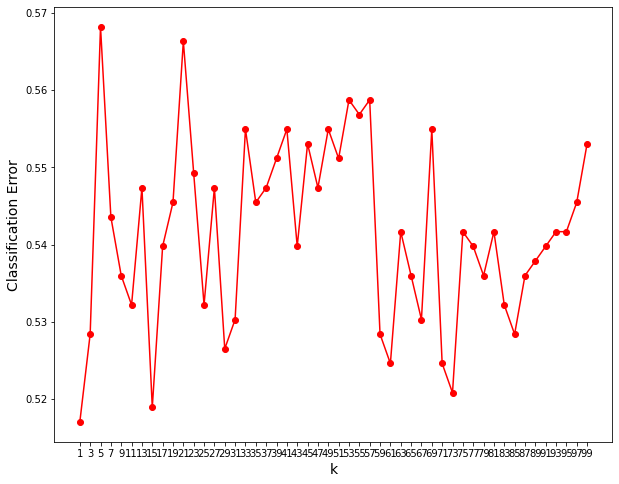

In [14]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()